## 1. Introduction

In today's data-driven financial landscape, the development of a Financial Sentiment Analysis Model is of paramount importance. This model harnesses natural language processing and machine learning techniques to systematically evaluate sentiment in financial data, offering invaluable insights for investment decisions, risk management, and market forecasting. By quantifying sentiments expressed in various financial sources, this model not only addresses the growing demand for sophisticated data analysis tools but also paves the way for innovative applications that can enhance decision-making processes across the financial industry, promising a more informed and competitive future. Therefore, this project's objective is to develop a Financial Sentiment Analysis Model that can predict the sentiment of financial markets and assets accurately, enabling investors, traders, and financial professionals to make more informed decisions and navigate the complexities of the ever-evolving financial landscape with greater confidence.

## 2. Methodology

The methodology encompasses key stages, starting with data collection from Kaggle. Subsequently, data is split and undergoes exploratory analysis (EDA) to understand its characteristics. Following EDA, the data is preprocessed, including sentence cleaning, tokenization, stopword removal, stemming, lemmatization, class imbalance handling, and label encoding. The modeling phase employs Text Blob model, ML models with TF-IDF, and LSTM with Word2Vec, concluding with comprehensive evaluation of the models.

## 3. Development of Financial Sentiment Analysis Model

### 3.1 Import Libraries

In [1]:
# Operating System and File Handling
import os

# Data Manipulation and Analysis
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from sklearn.utils import resample
import random

# Data Visualization
import matplotlib.pyplot as plt

# Machine Learning - Data Splitting
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# Machine Learning - Imbalance Handling
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, ADASYN

# Natural Language Processing (NLP) - Tokenization and Text Processing
import nltk
import gensim
import re
import emoji
import multiprocessing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer, SnowballStemmer
nltk.download('omw-1.4')  # Downloading a specific nltk resource
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

# Label Encoding
from sklearn.preprocessing import LabelEncoder

# Modeling (Deep Learning)
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.metrics import f1_score
from tensorflow.keras.callbacks import EarlyStopping
from keras import backend as K
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization

# Machine Learning 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\aswin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### 3.2 Data Collection

This code snippet loads a CSV file named 'data.csv' from the current working directory into a Pandas DataFrame called 'data' and displays its initial rows.

In [2]:
# Get the data path
root_folder = os.getcwd()  
data_filename = 'data.csv' 
data_path = os.path.join(root_folder, data_filename)

# Load the CSV file
data = pd.read_csv(data_path)

# Find duplicate rows based on all columns
duplicate_rows = data[data.duplicated()]

# Remove duplicate rows and update the DataFrame
data = data.drop_duplicates()

# Print data shape and df
print("Shape of df:", data.shape)
data.head()

Shape of df: (5836, 2)


,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


### 3.3 Data Splitting

This code splits the data into training, validation, and test sets with stratification, calculates their sizes as percentages of the total data.

In [3]:
# Split the data into features (X) and labels (y)
X = data.drop(columns=['Sentiment'])  # Assuming you have other features besides 'Sentiment'
y = data['Sentiment']

# Stratified split by the "Sentiment" label
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=7)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=7)

# Calculate the percentages of each subset
total_samples = len(data)
train_percentage = len(X_train) / total_samples * 100
val_percentage = len(X_val) / total_samples * 100
test_percentage = len(X_test) / total_samples * 100

# Print the sizes and percentages of the subsets
print("Train data size:", len(X_train), f"({train_percentage:.0f}%)")
print("Validation data size:", len(X_val), f"({val_percentage:.0f}%)")
print("Test data size:", len(X_test), f"({test_percentage:.0f}%)")

Train data size: 2334 (40%)
Validation data size: 1751 (30%)
Test data size: 1751 (30%)


### 3.4 Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the process of visually and statistically examining a dataset to uncover patterns, trends, and insights before formal modeling, helping to understand its characteristics and inform subsequent data analysis.

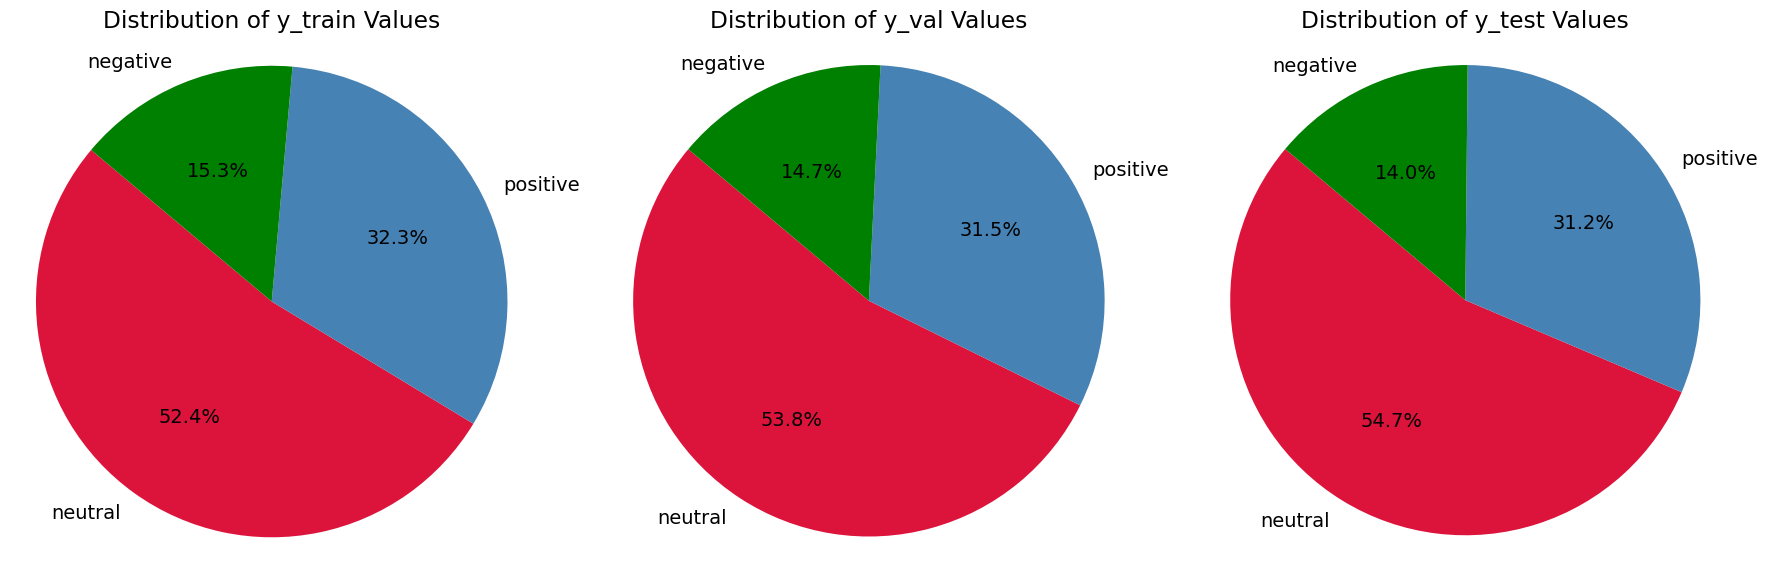

In [4]:
# Use value_counts to get the counts for y_train, y_val, and y_test
value_counts_train = y_train.value_counts()
value_counts_val = y_val.value_counts()
value_counts_test = y_test.value_counts()

# Set custom colors
colors = ['crimson', 'steelblue', 'green']

# Set the font size for labels
plt.rcParams['font.size'] = 14

# Create a 1x3 grid of subplots
plt.figure(figsize=(18, 6))

# Plotting the pie chart for y_train
plt.subplot(131)
plt.pie(value_counts_train, labels=value_counts_train.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')
plt.title('Distribution of y_train Values')

# Plotting the pie chart for y_val
plt.subplot(132)
plt.pie(value_counts_val, labels=value_counts_val.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')
plt.title('Distribution of y_val Values')

# Plotting the pie chart for y_test
plt.subplot(133)
plt.pie(value_counts_test, labels=value_counts_test.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')
plt.title('Distribution of y_test Values')

# Adjust layout for better spacing
plt.tight_layout()

# Show all three charts
plt.show()

### 3.5 Text Preprocessing and Model Training

"Text preprocessing and model training" refers to the combined process of preparing textual data for machine learning by applying various techniques such as tokenization, stop-word removal, stemming, and vectorization (e.g., TF-IDF or word embeddings), followed by training a machine learning or deep learning model on the processed text data for tasks like classification, sentiment analysis, or language generation. In this project we focus on text preprocessing and model training for sentiment analysis on financial market data.

### A. TextBlob

The code utilizes the TextBlob library, which relies on a pre-trained machine learning model for sentiment analysis. This model is trained on generic text data and can classify text as positive, negative, or neutral based on sentiment polarity. The code evaluates this model's performance using accuracy and F1 scores on different datasets, like training, validation, and test sets. If this initial approach doesn't yield satisfactory results, alternative algorithms can be explored.

In [5]:
# Define a function to perform sentiment analysis and calculate metrics
def analyze_sentiment_and_metrics(X, y):
    # Initialize a list to store predicted labels for the dataset
    predicted_labels = []

    # Perform sentiment analysis and collect predicted labels for the dataset
    for text in X.iloc[:, 0]:  # Extract the text from the DataFrame
        analysis = TextBlob(text)
        predicted_sentiment = "positive" if analysis.sentiment.polarity > 0 else "negative" if analysis.sentiment.polarity < 0 else "neutral"
        predicted_labels.append(predicted_sentiment)

    # Convert y to a NumPy array or list
    y_array = y.to_numpy() if isinstance(y, pd.Series) else y.tolist()

    # Calculate accuracy and F1 score for the dataset
    accuracy = accuracy_score(y_array, predicted_labels)
    f1_macro = f1_score(y_array, predicted_labels, average='macro')  # Use 'macro' averaging
    
    return accuracy, f1_macro

# Call the function for train, val, and test datasets
train_accuracy_tb, train_f1_tb = analyze_sentiment_and_metrics(X_train, y_train)
val_accuracy_tb, val_f1_tb = analyze_sentiment_and_metrics(X_val, y_val)
test_accuracy_tb, test_f1_tb = analyze_sentiment_and_metrics(X_test, y_test)

# Print the F1 score and accuracy for the Text Blob model
print("Accuracy:")
print(f"Train Accuracy for Text Blob Model: {train_accuracy_tb:.2f}")
print(f"Validation Accuracy for Text Blob Model: {val_accuracy_tb:.2f}")
print(f"Test Accuracy for Text Blob Model: {test_accuracy_tb:.2f}")
print()
print("F1 Score:")
print(f"Train F1 Score for Text Blob Model: {train_f1_tb:.2f}")
print(f"Validation F1 Score for Text Blob Model: {val_f1_tb:.2f}")
print(f"Test F1 Score for Text Blob Model: {test_f1_tb:.2f}")

Accuracy:
Train Accuracy for Text Blob Model: 0.45
Validation Accuracy for Text Blob Model: 0.46
Test Accuracy for Text Blob Model: 0.46

F1 Score:
Train F1 Score for Text Blob Model: 0.41
Validation F1 Score for Text Blob Model: 0.42
Test F1 Score for Text Blob Model: 0.41


### B. Machine Learning Models with TF-IDF

ML models with TF-IDF is a common and effective approach for text classification tasks. It leverages TF-IDF scores to represent text data and employs the ML algorithms for classification.

##### Text Preprocessing

Text preprocessing involves cleaning and transforming text data to make it suitable for analysis or modeling. This code defines a function, preprocess_text, which preprocesses text by replacing contractions, removing URLs, special characters, and non-ASCII characters, converting to lowercase, removing emojis, tokenizing, removing common stopwords, and applying stemming. This function is applied to text data in X_train, X_val, and X_test DataFrames. The original 'Sentence' column is then dropped from each DataFrame, resulting in processed text data. Lastly, this code also label encodes the sentiment classes.

In [6]:
# Create copies of the training, validation, and test datasets for machine learning purposes
X_train_ml = X_train.copy()    # Copy the training features
X_val_ml = X_val.copy()        # Copy the validation features
X_test_ml = X_test.copy()      # Copy the test features

y_train_ml = y_train[:]        # Create a copy of the training labels
y_val_ml = y_val[:]            # Create a copy of the validation labels
y_test_ml = y_test[:]          # Create a copy of the test labels

In [7]:
def preprocess_text(text):
    # Step 1: Clean the text
    # Replace URLs with a space
    text = re.sub(r"http\S+", " ", text)
    text = re.sub(r"http", " ", text)
    # Replace '@' with 'at'
    text = re.sub(r"@", "at", text)
    # Replace hashtags with a space
    text = re.sub(r"#[A-Za-z0-9_]+", ' ', text)
    # Remove special characters, punctuation, and non-alphanumeric characters
    text = re.sub(r"[^A-Za-z(),!?@\'\"_\n]", " ", text)
    # Convert to lowercase
    text = text.lower()
    # Remove emoji characters
    text = emoji.demojize(text)
    # Remove non-ASCII characters
    text = ''.join([c for c in text if ord(c) < 128])

    # Step 2: Tokenization
    tokens = word_tokenize(text)

    # Step 3: Stopword Removal
    stop_words = set(stopwords.words('english'))
    additional_stopwords = ['rt', 'mkr', 'didn', 'bc', 'n', 'm', 'im', 'll', 'y', 've', 'u', 'ur', 'don', 'p', 't', 's', 'aren', 'kp', 'o', 'kat', 'de', 're', 'amp', 'will']
    stop_words.update(additional_stopwords)
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    # Step 4: Lemmatization with WordNet Lemmatizer
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    # Step 5: Stemming with Snowball Stemmer
    stemmer = SnowballStemmer("english")
    stemmed_tokens = [stemmer.stem(token) for token in lemmatized_tokens]

    return lemmatized_tokens


# Apply the preprocess_text function to the 'Sentence' column of X_train, X_val, and X_test
X_train_ml['Processed_Tokens'] = X_train_ml['Sentence'].apply(preprocess_text)
X_val_ml['Processed_Tokens'] = X_val_ml['Sentence'].apply(preprocess_text)
X_test_ml['Processed_Tokens'] = X_test_ml['Sentence'].apply(preprocess_text)

# Remove the original 'Sentence' column from X_train, X_val, and X_test
X_train_ml.drop(columns=['Sentence'], inplace=True)
X_val_ml.drop(columns=['Sentence'], inplace=True)
X_test_ml.drop(columns=['Sentence'], inplace=True)

# Print the processed DataFrame
X_train_ml.head()

,Processed_Tokens
2838,"[brk, b, spy, time, high, tomorrow, ?, k, shar..."
173,"[looking, sharp, move, equity, aapl, hd, low, ..."
2067,"[risto, jalo, ,, chief, executive, dormus, pri..."
2859,"[isrg, break, confirmed, bought, leap, good, t..."
1734,"[aim, ensure, vacon, good, shape, capital, exp..."


In [8]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels for training data
y_train_ml = label_encoder.fit_transform(y_train_ml)

# Apply preprocessing to validation and test data
y_val_ml = label_encoder.transform(y_val_ml)
y_test_ml = label_encoder.transform(y_test_ml)

# Print the first few encoded labels for training data
print(y_train_ml[:10])

[2 2 1 2 2 1 1 0 1 2]


##### Feature Engineering - TF-IDF

TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic used in natural language processing and information retrieval to measure the importance of a term in a document relative to a collection of documents, helping to identify key terms and reduce the impact of common words. This code performs TF-IDF vectorization on text data, creating TF-IDF representations that can be used as input features for machine learning models.

In [9]:
def tfidf_vectorize(train_set, val_set, test_set):
    
    # Join the tokenized words back into sentences
    train_set['Processed_Sentences'] = train_set['Processed_Tokens'].apply(lambda tokens: ' '.join(tokens))
    val_set['Processed_Sentences'] = val_set['Processed_Tokens'].apply(lambda tokens: ' '.join(tokens))
    test_set['Processed_Sentences'] = test_set['Processed_Tokens'].apply(lambda tokens: ' '.join(tokens))
    
    # Drop the Processed_Tokens column
    train_set.drop(columns=['Processed_Tokens'], inplace=True)
    val_set.drop(columns=['Processed_Tokens'], inplace=True)
    test_set.drop(columns=['Processed_Tokens'], inplace=True)
    
    # Initialize the TF-IDF vectorizer
    tfidf_vectorizer = TfidfVectorizer()
    
    # Fit and transform the TF-IDF vectorizer on the train set
    X_train_tfidf = tfidf_vectorizer.fit_transform(train_set['Processed_Sentences'])
    
    # Transform the validation and test sets using the same vectorizer
    X_val_tfidf = tfidf_vectorizer.transform(val_set['Processed_Sentences'])
    X_test_tfidf = tfidf_vectorizer.transform(test_set['Processed_Sentences'])
    
    return X_train_tfidf.toarray(), X_val_tfidf.toarray(), X_test_tfidf.toarray()

# Usage
X_train_tfidf, X_val_tfidf, X_test_tfidf = tfidf_vectorize(X_train_ml, X_val_ml, X_test_ml)

# Print the TF-IDF matrix for the first sentence on X_train
print(X_train_tfidf[0])

[0. 0. 0. ... 0. 0. 0.]


##### Class Imbalance Handling

Class imbalance handling techniques address the unequal distribution of classes in a dataset to improve the performance of machine learning models, often involving methods like undersampling or uversampling. In the provided code, the Synthetic Minority Over-sampling Technique (SMOTE) is used to balance class distribution in the training data by generating synthetic examples of the minority class, enhancing the model's ability to learn from underrepresented class instances.

In [10]:
# Create an instance of SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=62)

# Fit and transform the training data
X_train_tfidf, y_train_ml = smote.fit_resample(X_train_tfidf, y_train_ml)

In [11]:
unique_values, counts = np.unique(y_train_ml, return_counts=True)

# Print unique values and their counts
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

print(" ")
total_samples = len(X_train_tfidf) + len(X_val) + len(X_test)
train_size = len(X_train_tfidf)
val_size = len(X_val)
test_size = len(X_test)

print(f"Total samples: {total_samples}")
print(f"X_train_tfidf size: {train_size} samples ({(train_size / total_samples) * 100:.0f}%)")
print(f"X_val size: {val_size} samples ({(val_size / total_samples) * 100:.0f}%)")
print(f"X_test size: {test_size} samples ({(test_size / total_samples) * 100:.0f}%)")

Value: 0, Count: 1224
Value: 1, Count: 1224
Value: 2, Count: 1224
 
Total samples: 7174
X_train_tfidf size: 3672 samples (51%)
X_val size: 1751 samples (24%)
X_test size: 1751 samples (24%)


##### Machine Learning Models

The code defines hyperparameter grids for Randomized Search on two classifiers (Multinomial Naive Bayes and Random Forest), conducts hyperparameter tuning, and prints the best hyperparameters for each classifier while also evaluating their performance on training, validation, and test sets.

In [13]:
# Define the hyperparameter grids for random search for each classifier
param_dists = {
    'Multinomial Naive Bayes': {
        'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0], 
        'fit_prior': [True, False],
    },
    'Random Forest': {
        'n_estimators': [100, 300, 500],
        'max_depth': [4, 8, 10, 15, 20],
        'min_samples_split': [2, 5, 10, 15, 20],
        'min_samples_leaf': [1, 2, 4, 6, 8],
    }
}

# Create a dictionary of classifiers
classifiers = {
    'Multinomial Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(random_state=42),
}

# Define the scoring metric (macro F1-score in this case)
scorer = make_scorer(f1_score, average='macro')

# Initialize empty dictionaries to store test scores
test_accuracy_ml = {}
test_f1_ml = {}

# Iterate over classifiers
for classifier_name, classifier in classifiers.items():
    # Create RandomizedSearchCV object with n-fold cross-validation for the current classifier
    random_search = RandomizedSearchCV(estimator=classifier, param_distributions=param_dists[classifier_name], 
                                       scoring=scorer, cv=5, n_iter=10, random_state=72)
    
    # Fit the random search to your data
    random_search.fit(X_train_tfidf, y_train_ml)

    # Print the best hyperparameters and corresponding macro F1-score for the current classifier
    best_hyperparameters = random_search.best_params_
    best_macro_f1_score = random_search.best_score_

    # Calculate and print the accuracy on the training, validation, and test sets using the best model
    best_model = random_search.best_estimator_
    train_predictions = best_model.predict(X_train_tfidf)
    val_predictions = best_model.predict(X_val_tfidf)
    test_predictions = best_model.predict(X_test_tfidf)

    # Calculate and print the accuracy on the training, validation, and test sets  using the best model
    train_accuracy = accuracy_score(y_train_ml, train_predictions)
    val_accuracy = accuracy_score(y_val_ml, val_predictions)
    test_accuracy = accuracy_score(y_test_ml, test_predictions)
    
    print("Accuracy:")
    print(f"Train Accuracy for {classifier_name}: {train_accuracy:.2f}")
    print(f"Validation Accuracy for {classifier_name}: {val_accuracy:.2f}")
    print(f"Test Accuracy for {classifier_name}: {test_accuracy:.2f}")
    
    # Store test accuracy in the dictionary
    test_accuracy_ml[classifier_name] = test_accuracy
    
    print(" ")
    
    # Calculate and print the F1-score on the training and validation sets using the best model
    train_macro_f1 = f1_score(y_train_ml, train_predictions, average='macro')
    val_macro_f1 = f1_score(y_val_ml, val_predictions, average='macro')
    test_macro_f1 = f1_score(y_test_ml, test_predictions, average='macro')

    print("F1 Score:")
    print(f"Train F1 Score for {classifier_name}: {train_macro_f1:.2f}")
    print(f"Validation F1 Score for {classifier_name}: {val_macro_f1:.2f}")
    print(f"Test F1 Score for {classifier_name}: {test_macro_f1:.2f}")
    
    # Store test F1-score in the dictionary
    test_f1_ml[classifier_name] = test_macro_f1
    
    print("")

Accuracy:
Train Accuracy for Multinomial Naive Bayes: 0.94
Validation Accuracy for Multinomial Naive Bayes: 0.62
Test Accuracy for Multinomial Naive Bayes: 0.62
 
F1 Score:
Train F1 Score for Multinomial Naive Bayes: 0.94
Validation F1 Score for Multinomial Naive Bayes: 0.56
Test F1 Score for Multinomial Naive Bayes: 0.56

Accuracy:
Train Accuracy for Random Forest: 0.77
Validation Accuracy for Random Forest: 0.64
Test Accuracy for Random Forest: 0.65
 
F1 Score:
Train F1 Score for Random Forest: 0.77
Validation F1 Score for Random Forest: 0.55
Test F1 Score for Random Forest: 0.58



### C.  Long short-term memory (LSTM) with Word2Vec

LSTM with Word2Vec combines LSTM neural networks with Word2Vec word embeddings, enabling deep learning models to capture contextual information and semantic relationships in textual data for sentiment prediction.

##### Text Preprocessing

Text preprocessing involves cleaning and transforming text data to make it suitable for analysis or modeling. This code defines a function, preprocess_text, which preprocesses text by replacing contractions, removing URLs, special characters, and non-ASCII characters, converting to lowercase, removing emojis, tokenizing, removing common stopwords, and applying stemming. This function is applied to text data in X_train, X_val, and X_test DataFrames. The original 'Sentence' column is then dropped from each DataFrame, resulting in processed text data. Lastly, this code also label encodes the sentiment classes.

In [14]:
# Create copies of the DataFrames and arrays for Bi-LSTM model
X_train_bi_lstm = X_train.copy()  # Copy of training data
X_val_bi_lstm = X_val.copy()      # Copy of validation data
X_test_bi_lstm = X_test.copy()    # Copy of test data

y_train_bi_lstm = y_train[:]     # Copy of training labels
y_val_bi_lstm = y_val[:]         # Copy of validation labels
y_test_bi_lstm = y_test[:]       # Copy of test labels

In [15]:
def preprocess_text(text):
    # Step 1: Clean the text
    # Replace URLs with a space
    text = re.sub(r"http\S+", " ", text)
    text = re.sub(r"http", " ", text)
    # Replace '@' with 'at'
    text = re.sub(r"@", "at", text)
    # Replace hashtags with a space
    text = re.sub(r"#[A-Za-z0-9_]+", ' ', text)
    # Remove special characters, punctuation, and non-alphanumeric characters
    text = re.sub(r"[^A-Za-z(),!?@\'\"_\n]", " ", text)
    # Convert to lowercase
    text = text.lower()
    
    # Replace contractions with their expanded forms
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"'re", " are", text)
    text = re.sub(r"'s", " is", text)
    text = re.sub(r"'d", " would", text)
    text = re.sub(r"'ll", " will", text)
    text = re.sub(r"'t", " not", text)
    text = re.sub(r"'ve", " have", text)
    text = re.sub(r"'m", " am", text)

    # Step 2: Tokenization
    tokens = word_tokenize(text)

    # Step 3: Stopword Removal
    stop_words = set(stopwords.words('english'))
    additional_stopwords = ['rt', 'mkr', 'didn', 'bc', 'n', 'm', 'im', 'll', 'y', 've', 'u', 'ur', 'don', 'p', 't', 's', 'aren', 'kp', 'o', 'kat', 'de', 're', 'amp', 'will']
    stop_words.update(additional_stopwords)
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    # Step 4: Lemmatization with WordNet Lemmatizer
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    # Step 5: Stemming with Snowball Stemmer
    stemmer = SnowballStemmer("english")
    stemmed_tokens = [stemmer.stem(token) for token in lemmatized_tokens]

    return lemmatized_tokens


# Apply the preprocess_text function to the 'Sentence' column of X_train, X_val, and X_test
X_train_bi_lstm['Processed_Tokens'] = X_train_bi_lstm['Sentence'].apply(preprocess_text)
X_val_bi_lstm['Processed_Tokens'] = X_val_bi_lstm['Sentence'].apply(preprocess_text)
X_test_bi_lstm['Processed_Tokens'] = X_test_bi_lstm['Sentence'].apply(preprocess_text)

# Remove the original 'Sentence' column from X_train, X_val, and X_test
X_train_bi_lstm.drop(columns=['Sentence'], inplace=True)
X_val_bi_lstm.drop(columns=['Sentence'], inplace=True)
X_test_bi_lstm.drop(columns=['Sentence'], inplace=True)

# Print the processed DataFrame
X_train_bi_lstm.head()

,Processed_Tokens
2838,"[brk, b, spy, time, high, tomorrow, ?, k, shar..."
173,"[looking, sharp, move, equity, aapl, hd, low, ..."
2067,"[risto, jalo, ,, chief, executive, dormus, pri..."
2859,"[isrg, break, confirmed, bought, leap, good, t..."
1734,"[aim, ensure, vacon, good, shape, capital, exp..."


In [16]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels for training data
y_train_bi_lstm = label_encoder.fit_transform(y_train_bi_lstm)

# Apply preprocessing to validation and test data
y_val_bi_lstm = label_encoder.transform(y_val_bi_lstm)
y_test_bi_lstm = label_encoder.transform(y_test_bi_lstm)

# Print the first few encoded labels for training data
print(y_train_bi_lstm[:10])

[2 2 1 2 2 1 1 0 1 2]


##### Word2Vec

Word2Vec is a popular word embedding technique in natural language processing (NLP) that represents words as dense vectors in a continuous vector space, capturing semantic relationships between words based on their context in large text corpora, enabling applications like word similarity and language understanding in machine learning models. The provided code defines functions to train a Word2Vec model on a DataFrame containing processed tokenized text data and then applies this model to transform sentences into Word2Vec embeddings, ultimately demonstrating how to use Word2Vec embeddings for text data in a machine learning pipeline.

In [17]:
def train_word2vec_model(df):
    # Ensure that the 'Processed_Tokens' column contains lists of tokens
    sentences = df['Processed_Tokens'].tolist()
    
    # Create and train the Word2Vec model
    model = Word2Vec(sentences, 
                     vector_size=200,  # You can adjust the vector size as needed
                     window=1,          # Context window size
                     min_count=200,       # Minimum word frequency
                     sg=1,              # CBOW model (sg=1 for Skip-gram)
                     workers=multiprocessing.cpu_count())
    
    return model

def transform_to_word2vec(df, model):
    # Tokenize sentences
    sentences = df['Processed_Tokens'].tolist()
    
    # Transform sentences to Word2Vec vectors
    transformed_data = []
    for sentence in sentences:
        word_vectors = []
        for word in sentence:
            if word in model.wv:
                word_vectors.append(model.wv[word])
        transformed_data.append(word_vectors)
    
    return transformed_data

# Combine train, validation, and test sets into one DataFrame
combined_df = pd.concat([X_train_bi_lstm, X_val_bi_lstm, X_test_bi_lstm], ignore_index=True)

# Train the Word2Vec model on the combined data
word2vec_model = train_word2vec_model(combined_df)

# Transform the data using the trained model
X_train_word2vec = transform_to_word2vec(X_train_bi_lstm, word2vec_model)
X_val_word2vec = transform_to_word2vec(X_val_bi_lstm, word2vec_model)
X_test_word2vec = transform_to_word2vec(X_test_bi_lstm, word2vec_model)

# Print the word2vec embedding for first row
print(X_train_word2vec[0])

[array([ 0.04905925, -0.03647773, -0.08889966,  0.05980777,  0.02206747,
        0.01243594,  0.13590197,  0.21177924, -0.03225496, -0.03475187,
        0.00434861, -0.1096677 ,  0.0493065 ,  0.03453977, -0.07334282,
       -0.0536041 ,  0.0978601 ,  0.06268997, -0.02775418, -0.19879742,
        0.11117613, -0.0367852 ,  0.06962304,  0.02747884,  0.00362753,
       -0.06916136, -0.01493757, -0.02527484, -0.05878823, -0.03632146,
        0.06123356, -0.00927036,  0.12355637, -0.11819284, -0.04354499,
       -0.07781792,  0.05903404, -0.02347236, -0.00818588, -0.04470966,
       -0.02647572,  0.00142996, -0.02983089, -0.01247718,  0.02663247,
       -0.04214595, -0.01736298, -0.06418639,  0.06626554,  0.05925411,
        0.03773251, -0.11021508, -0.06643499, -0.05364742,  0.0252601 ,
       -0.02989584,  0.02563428, -0.06720787, -0.08263643,  0.07688006,
       -0.03650833, -0.11212558,  0.14307594,  0.05469023, -0.15707467,
        0.11004451, -0.11050803,  0.06752154, -0.15104057,  0.0

##### Padding

Padding is the technique of adding extra data, typically zeros, to the beginning or end of a sequence to ensure it meets a required length or format, often used in deep learning for batch processing sequences of varying lengths. 
This code defines a function, that makes sure all sequences in your data (train, validation, and test) have the same length by adding padding, and it's used to pad the Word2Vec embeddings for your text data.

In [18]:
def pad_sequences_custom(train_data, val_data, test_data):
    # Determine the maximum sequence length for each dataset
    max_sequence_length_train = max(len(seq) for seq in train_data)
    max_sequence_length_val = max(len(seq) for seq in val_data)
    max_sequence_length_test = max(len(seq) for seq in test_data)
    
    # Calculate the overall maximum sequence length
    max_sequence_length = max(max_sequence_length_train, max_sequence_length_val, max_sequence_length_test)
    
    # Pad sequences to match the calculated maximum sequence length
    train_padded = pad_sequences(train_data, maxlen=max_sequence_length)
    val_padded = pad_sequences(val_data, maxlen=max_sequence_length)
    test_padded = pad_sequences(test_data, maxlen=max_sequence_length)
    
    return train_padded, val_padded, test_padded, max_sequence_length

# Usage
X_train_padded, X_val_padded, X_test_padded, max_sequence_length = pad_sequences_custom(X_train_word2vec, X_val_word2vec, X_test_word2vec)

# Print padded sentence for the first row on X_train
print(X_train_padded[0])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


##### Reshaping

The reshape_for_deep_learning function is designed to adapt 2D data to the required 3D format compatible with LSTM architecture in TensorFlow, allowing it to handle sequential data effectively.

In [19]:
def reshape_for_deep_learning(data):
    # Determine the maximum number of words in a sentence
    max_len = max(len(sentence) for sentence in data)
    
    # Create a 3D array to hold the data
    num_samples = len(data)
    embedding_dim = len(data[0][0])  # Assuming all embeddings have the same dimension
    reshaped_data = np.zeros((num_samples, max_len, embedding_dim))
    
    # Fill the 3D array with data
    for i, sentence in enumerate(data):
        for j, word_vector in enumerate(sentence):
            reshaped_data[i, j, :] = word_vector
    
    return reshaped_data

# Reshape the data for deep learning models
X_train_reshaped = reshape_for_deep_learning(X_train_padded)
X_val_reshaped = reshape_for_deep_learning(X_val_padded)
X_test_reshaped = reshape_for_deep_learning(X_test_padded)

# Print the shape of the reshaped data to verify
print("Shape of X_train_reshaped:", X_train_reshaped.shape)
print("Shape of X_val_reshaped:", X_val_reshaped.shape)
print("Shape of X_test_reshaped:", X_test_reshaped.shape)

Shape of X_train_reshaped: (2334, 34, 200)
Shape of X_val_reshaped: (1751, 34, 200)
Shape of X_test_reshaped: (1751, 34, 200)


##### LSTM Model 

Long Short-Term Memory (LSTM) is a type of recurrent neural network (RNN) architecture designed to capture and process long-range dependencies in sequential data, making it well-suited for sentiment prediction.

In [20]:
# Set a specific random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Determine the number of unique classes (labels)
num_classes = len(np.unique(y_train_bi_lstm))

# Create LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(128, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
lstm_model.add(Dropout(0.5))  # Add dropout with a dropout rate of 0.5
lstm_model.add(LSTM(64, return_sequences=True))
lstm_model.add(LSTM(32, return_sequences=True))
lstm_model.add(LSTM(16, kernel_initializer='glorot_uniform'))
lstm_model.add(Dropout(0.5))  # Add dropout
lstm_model.add(Dropout(0.5))  # Add dropout
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dense(num_classes, activation='softmax'))


# Define custom metrics
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

# Define the learning rate
learning_rate = 0.001

# Create an optimizer with the specified learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Compile the model with categorical cross-entropy loss and custom metrics
lstm_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy', f1_m])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = lstm_model.fit(
    X_train_reshaped,
    tf.keras.utils.to_categorical(y_train_bi_lstm, num_classes=num_classes),
    epochs=15,
    batch_size=32,
    validation_data=(X_val_reshaped, tf.keras.utils.to_categorical(y_val_bi_lstm)),
    callbacks=[early_stopping]
)

Epoch 1/15
73/73 [==============================] - 7s 48ms/step - loss: 1.0868 - accuracy: 0.5223 - f1_m: 0.0000e+00 - val_loss: 1.0738 - val_accuracy: 0.5380 - val_f1_m: 0.0000e+00
Epoch 2/15
73/73 [==============================] - 3s 38ms/step - loss: 1.0656 - accuracy: 0.5244 - f1_m: 0.0000e+00 - val_loss: 1.0537 - val_accuracy: 0.5380 - val_f1_m: 0.0000e+00
Epoch 3/15
73/73 [==============================] - 3s 38ms/step - loss: 1.0486 - accuracy: 0.5244 - f1_m: 0.0000e+00 - val_loss: 1.0374 - val_accuracy: 0.5380 - val_f1_m: 0.0000e+00
Epoch 4/15
73/73 [==============================] - 3s 38ms/step - loss: 1.0351 - accuracy: 0.5244 - f1_m: 0.0000e+00 - val_loss: 1.0244 - val_accuracy: 0.5380 - val_f1_m: 0.0000e+00
Epoch 5/15
73/73 [==============================] - 3s 38ms/step - loss: 1.0244 - accuracy: 0.5244 - f1_m: 0.0000e+00 - val_loss: 1.0141 - val_accuracy: 0.5380 - val_f1_m: 0.0000e+00
Epoch 6/15
73/73 [==============================] - 3s 39ms/step - loss: 1.0161 - acc

In [21]:
# Evaluate the LSTM model on train, validation, and test data
train_scores_lstm = lstm_model.evaluate(X_train_reshaped, tf.keras.utils.to_categorical(y_train_bi_lstm, num_classes=num_classes), verbose=0)
val_scores_lstm = lstm_model.evaluate(X_val_reshaped, tf.keras.utils.to_categorical(y_val_bi_lstm), verbose=0)
test_scores_lstm = lstm_model.evaluate(X_test_reshaped, tf.keras.utils.to_categorical(y_test_bi_lstm), verbose=0)

# Print the scores rounded to two decimal places using f-strings
print("Accuracy:")
print(f"Train Accuracy for LSTM Model: {train_scores_lstm[1]:.2f}")
print(f"Val Accuracy for LSTM Model: {val_scores_lstm[1]:.2f}")
print(f"Test Accuracy for LSTM Model: {test_scores_lstm[1]:.2f}")
print()
print("F1 Score:")
print(f"Train F1 Score for LSTM Model: {train_scores_lstm[2]:.2f}")
print(f"Val F1 Score for LSTM Model: {val_scores_lstm[2]:.2f}")
print(f"Test F1 Score for LSTM Model: {test_scores_lstm[2]:.2f}")

Accuracy:
Train Accuracy for LSTM Model: 0.52
Val Accuracy for LSTM Model: 0.54
Test Accuracy for LSTM Model: 0.55

F1 Score:
Train F1 Score for LSTM Model: 0.52
Val F1 Score for LSTM Model: 0.54
Test F1 Score for LSTM Model: 0.55


## 4. Results

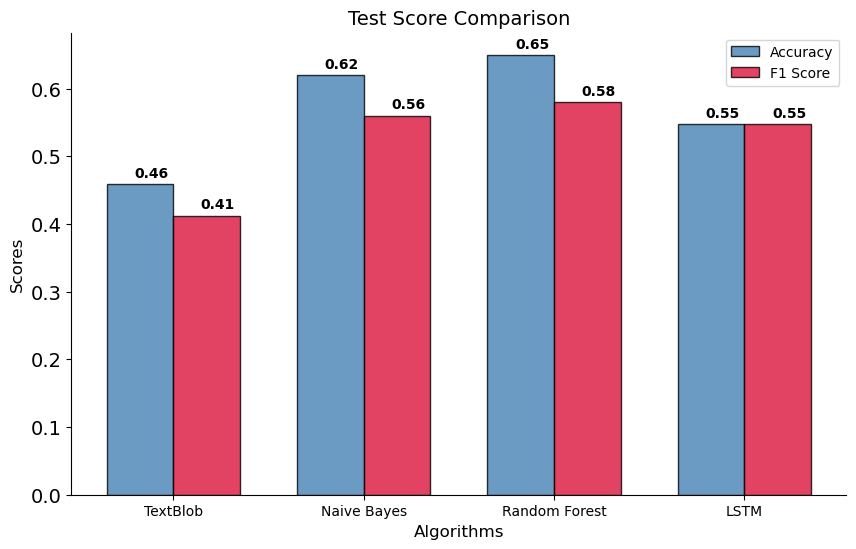

In [57]:
# Test scores for each algorithm
algorithms = ['TextBlob', 'Naive Bayes', 'Random Forest', 'LSTM']
accuracy_scores = [tb_accuracy, nb_accuracy, rf_accuracy, lstm_accuracy]
f1_scores = [tb_f1, nb_f1, rf_f1, lstm_f1]

# Define the color palette
color_palette = ['steelblue', 'crimson']

# Width of each bar
bar_width = 0.35
index = np.arange(len(algorithms))

plt.figure(figsize=(10, 6))

# Plot bars for accuracy
plt.bar(index, accuracy_scores, bar_width, color=color_palette[0], label='Accuracy', alpha=0.8, edgecolor='black')

# Plot bars for F1 score
plt.bar(index + bar_width, f1_scores, bar_width, color=color_palette[1], label='F1 Score', alpha=0.8, edgecolor='black')

# Adding labels and titles
plt.xlabel('Algorithms', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Test Score Comparison', fontsize=14)
plt.xticks(index + bar_width / 2, algorithms, fontsize=10)
plt.legend(loc='best', fontsize=10)

# Adding data labels on top of each bar
for i, v in enumerate(accuracy_scores):
    plt.text(i - 0.03, v + 0.01, str(round(v, 2)), fontsize=10, color='black', fontweight='bold')
    plt.text(i + bar_width - 0.03, f1_scores[i] + 0.01, str(round(f1_scores[i], 2)), fontsize=10, color='black', fontweight='bold')

# Removing the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

## 5. Conclusion

In this sentiment analysis project, we experimented with four models: Text Blob (baseline model), Multinomial Naive Bayes with TF-IDF, Random Forest with TF-IDF, and LSTM with Word2Vec. Although Multinomial Naive Bayes was more accurate, we favored the Random Forest, which, while a bit less accurate, generalized better. Additionally, the LSTM model, despite being deep learning, only did better than Text Blob, not surpassing Multinomial Naive Bayes or Random Forest. This suggests that deep learning models always doesn't guarantee superior results. In conclusion, Random Forest's strong generalizability makes it the top choice for sentiment prediction. After rigorous experimentation and fine-tuning, the winning model's performance remains satisfactory; thus, future work should focus on collecting a more extensive and diverse dataset for financial market sentiment analysis to bolster model robustness and explore its performance in broader data contexts.